In [ ]:
import pandas as pd

df = pd.read_csv("/content/Commercial Doc Classification data.csv")
df.head()

,X,Y
0,United Arab Emirates Saatall Aas yal) alley \u...,0
1,\u2018DELIVERY ORDER\n\nGenerated using Dubai ...,0
2,"Wee\n\ni , DK09025040118\nBILL- OF LADING (NOT...",0
3,FH WTeAeKBReARAT\n| Re ZHEJIANG SUPER POWER FI...,1
4,A Wile AwBKR SARA A\n\nCHAO\n\nZHEJIANG SUPER ...,0


In [ ]:
# Step 1: Prepare data
X = df["X"].str.lower().str.replace(r"\\n", " ", regex=True).str.replace(r"\\u[\dA-Fa-f]+", " ", regex=True)
y = df["Y"]

In [ ]:
X[0]

'united arab emirates saatall aas yal) alley  ih page 1-of 41 uae customs i key) blea  dubai customs est alem cah lad eh lam uae customs  porttype esi 4| [dec type owes 3| [dec date cea 2|[decno owls 1 sea \\"02/08/2026 101-27076169-25 | customs declaration import to local from row 141115692858 (se olen net weight geile c5 ll importer / exporter shaddifo,sueat] 6 | [delivery order no. atu on 8 | 5 | 44670 (kg) ae-3002412 - emirates fire fighting equiriment factory llc (i - e0812) gross weight eta cist [10] [intercessor co. abwasit 4st] 9 | [ carrier\'s \\\\ captain \\\\ driver sts/uaaiacun| 8 | 46520 (kg) ae-1054554 - emirates shipping line llc measurement wt |13] [ commercial reg. no. aoi deat! 34/12] [ carrier\'s name amu au} | 71] 1796 esl wasl no.of packages ashi se [16] | tin no. gai 98/124] [ voyage/ flight no. ala [14 | 100216316400003 935133 marks & numbers exported to 4a jaa] 15 | [b\\\\l- awb no./ manif. cobliadt/ancosd galt a 117 |  firex, firex emivchnnino15220  port of loa

In [ ]:
# Step 2: Split data (even though it's small, to simulate real-world pipeline)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create pipeline
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=20, stop_words="english")),
    ("clf", DecisionTreeClassifier(max_depth=3, random_state=42))
])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# # Step 1: Prepare data
# X = df["X"].str.lower().str.replace(r"\\n", " ", regex=True).str.replace(r"\\u[\dA-Fa-f]+", " ", regex=True)
# y = df["Y"]

# Step 2: Split data (even though it's small, to simulate real-world pipeline)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create pipeline
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=20, stop_words="english")),
    ("clf", DecisionTreeClassifier(max_depth=3, random_state=42))
])

# Step 4: Train model
pipeline.fit(X_train, y_train)

# Step 5: Extract rules
vectorizer = pipeline.named_steps["tfidf"]
classifier = pipeline.named_steps["clf"]
feature_names = vectorizer.get_feature_names_out()
rules = export_text(classifier, feature_names=list(feature_names))

rules


'|--- 2025 <= 0.15\n|   |--- class: 1\n|--- 2025 >  0.15\n|   |--- class: 0\n'

In [ ]:
# Re-import necessary packages after code execution state reset
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# # Reload the dataset
# file_path = "/mnt/data/Commercial Doc Classification data.csv"
# df = pd.read_csv(file_path)

# Define the cleaning function again
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\\n", " ", text)
    text = re.sub(r"\\u[\dA-Fa-f]+", " ", text)
    text = re.sub(r"[^\w\s]", " ", text)
    text = re.sub(r"\d+", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Apply cleaning
X_cleaned = df["X"].apply(clean_text)
y = df["Y"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42)

# Create and train pipeline
pipeline_cleaned = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=20, stop_words="english")),
    ("clf", DecisionTreeClassifier(max_depth=3, random_state=42))
])

pipeline_cleaned.fit(X_train, y_train)

# Extract rules
vectorizer_cleaned = pipeline_cleaned.named_steps["tfidf"]
classifier_cleaned = pipeline_cleaned.named_steps["clf"]
feature_names_cleaned = vectorizer_cleaned.get_feature_names_out()
rules_cleaned = export_text(classifier_cleaned, feature_names=list(feature_names_cleaned))

rules_cleaned


'|--- fighting <= 0.24\n|   |--- class: 1\n|--- fighting >  0.24\n|   |--- class: 0\n'

In [ ]:
X_cleaned[0]

'united arab emirates saatall aas yal alley ih page of uae customs i key blea dubai customs est alem cah lad eh lam uae customs porttype esi dec type owes dec date cea decno owls sea customs declaration import to local from row se olen net weight geile c ll importer exporter shaddifo sueat delivery order no atu on kg ae emirates fire fighting equiriment factory llc i e gross weight eta cist intercessor co abwasit st carrier s captain driver sts uaaiacun kg ae emirates shipping line llc measurement wt commercial reg no aoi deat carrier s name amu au esl wasl no of packages ashi se tin no gai voyage flight no ala marks numbers exported to a jaa b l awb no manif cobliadt ancosd galt a firex firex emivchnnino port of loading daal pga ningbo port of discharge e kl elie jebel ali destination chal aga loc jebel ali pr dubai ports world facility container nos esdu esdu asl glleal jasin ine aelia wines total duty goods description fire fighting equipmen ols item ctu packages plat customs restri

the data quality improved!!!

In [ ]:
# Step 1: Get TF-IDF feature importance (top 20 features)
import numpy as np

# Get TF-IDF matrix for training data
tfidf_vectorizer = pipeline_cleaned.named_steps["tfidf"]
X_train_tfidf = tfidf_vectorizer.transform(X_train)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get feature importances from the decision tree
importances = pipeline_cleaned.named_steps["clf"].feature_importances_
top_indices = np.argsort(importances)[::-1]

# Pair features with their importance scores
top_features = [(feature_names[i], importances[i]) for i in top_indices if importances[i] > 0]

# Step 2: Run prediction on the full dataset to identify misclassifications
df["cleaned_text"] = X_cleaned
df["predicted"] = pipeline_cleaned.predict(X_cleaned)
df["correct"] = df["predicted"] == df["Y"]

(top_features, df[["X", "Y", "predicted", "correct"]])

([('fighting', np.float64(1.0))],
                                                    X  Y  predicted  correct
 0  United Arab Emirates Saatall Aas yal) alley \u...  0          0     True
 1  \u2018DELIVERY ORDER\n\nGenerated using Dubai ...  0          0     True
 2  Wee\n\ni , DK09025040118\nBILL- OF LADING (NOT...  0          0     True
 3  FH WTeAeKBReARAT\n| Re ZHEJIANG SUPER POWER FI...  1          1     True
 4  A Wile AwBKR SARA A\n\nCHAO\n\nZHEJIANG SUPER ...  0          0     True
 5  ORIGINAL\n: aa \u201cSerial No. \u2014 CCPIT34...  0          0     True)

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Load your CSV
df = pd.read_csv("Commercial Doc Classification data.csv")  # Adjust path if needed

# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\\n", " ", text)
    text = re.sub(r"\\u[\dA-Fa-f]+", " ", text)
    text = re.sub(r"[^\w\s]", " ", text)  # Remove punctuation
    text = re.sub(r"\d+", " ", text)  # Optional: remove numbers
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Apply cleaning
df["cleaned_text"] = df["X"].apply(clean_text)
X = df["cleaned_text"]
y = df["Y"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline with more features and deeper tree
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=50, stop_words="english")),
    ("clf", DecisionTreeClassifier(max_depth=5, random_state=42))
])

# Train model
pipeline.fit(X_train, y_train)

# Extract decision tree rules
vectorizer = pipeline.named_steps["tfidf"]
classifier = pipeline.named_steps["clf"]
feature_names = vectorizer.get_feature_names_out()

# Print the tree as readable text
rules = export_text(classifier, feature_names=list(feature_names))
print(rules)

|--- port <= 0.13
|   |--- class: 0
|--- port >  0.13
|   |--- class: 1



In [ ]:
df["predicted"] = pipeline.predict(X)
df["correct"] = df["predicted"] == df["Y"]

# View misclassified rows
print(df[df["correct"] == False][["X", "Y", "predicted"]])

                                                   X  Y  predicted
0  United Arab Emirates Saatall Aas yal) alley \u...  0          1
1  \u2018DELIVERY ORDER\n\nGenerated using Dubai ...  0          1


In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("Commercial Doc Classification data.csv")

# Clean text function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\\n", " ", text)
    text = re.sub(r"\\u[\dA-Fa-f]+", " ", text)
    text = re.sub(r"[^\w\s]", " ", text)
    text = re.sub(r"\d+", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Apply cleaning
df["cleaned_text"] = df["X"].apply(clean_text)
X = df["cleaned_text"]
y = df["Y"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF + Decision Tree pipeline
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=50, stop_words="english")),
    ("clf", DecisionTreeClassifier(max_depth=5, random_state=42))
])

# Train
pipeline.fit(X_train, y_train)

# Export rules
vectorizer = pipeline.named_steps["tfidf"]
classifier = pipeline.named_steps["clf"]
feature_names = vectorizer.get_feature_names_out()
rules_text = export_text(classifier, feature_names=list(feature_names))
print(rules_text)

|--- port <= 0.13
|   |--- class: 0
|--- port >  0.13
|   |--- class: 1



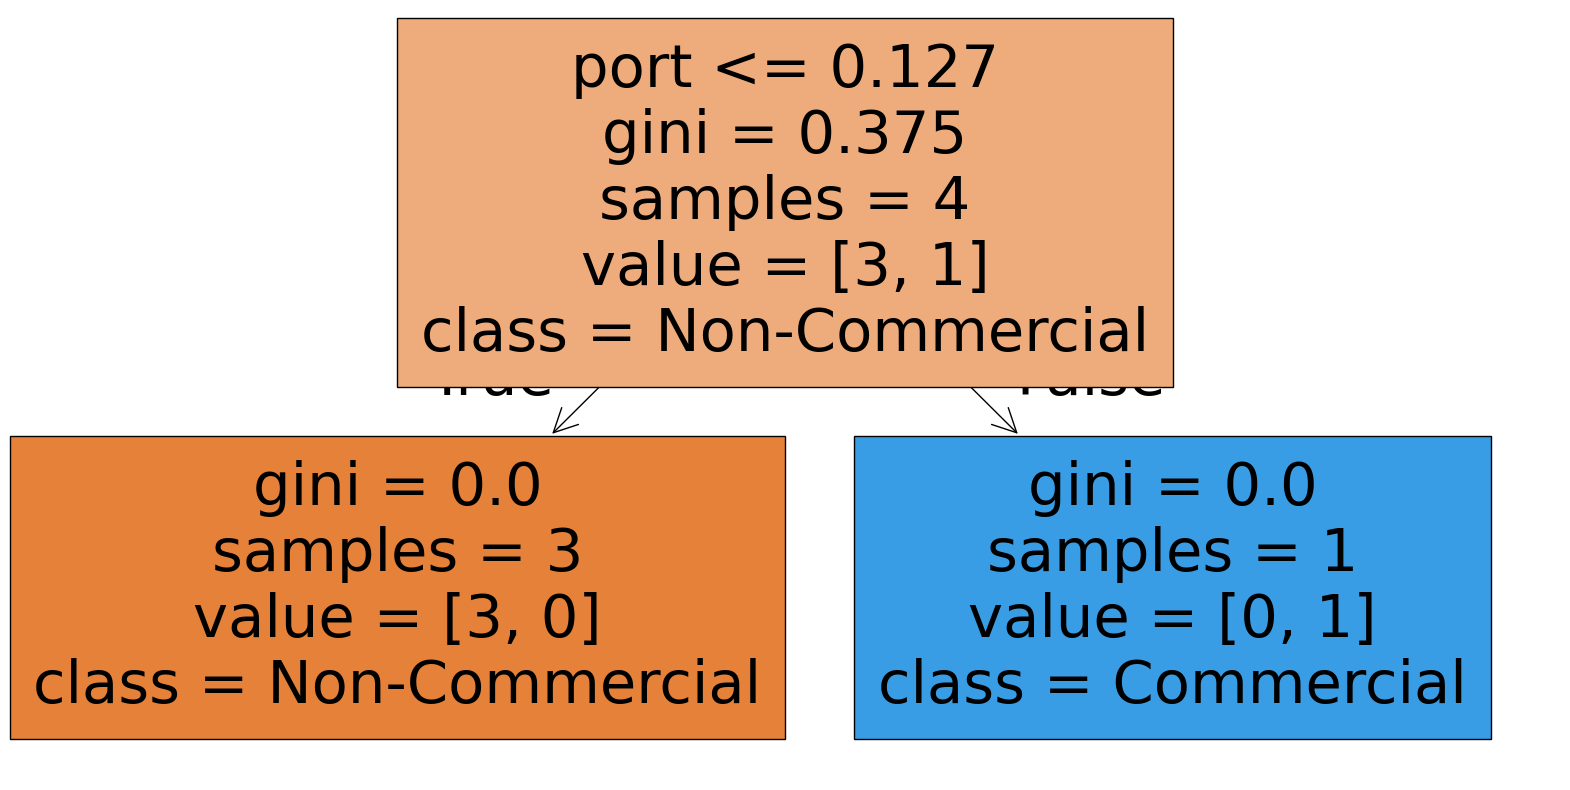

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(classifier, feature_names=feature_names, class_names=["Non-Commercial", "Commercial"], filled=True)
plt.savefig("decision_tree_rules.png", dpi=300)
plt.show()

In [ ]:
def convert_export_text_to_if_else(tree_text):
    lines = tree_text.strip().split("\n")
    indent_unit = "    "
    code_lines = ["def is_commercial_doc(features):"]

    for line in lines:
        indent_level = line.count("|   ")
        line = line.replace("|   ", "").replace("|--- ", "")
        spacing = indent_unit * (indent_level + 1)

        if "<=" in line or ">" in line:
            feature, condition = line.split(" <= " if "<=" in line else " > ")
            op = "<=" if "<=" in line else ">"
            code_lines.append(f"{spacing}if features['{feature.strip()}'] {op} {condition.strip()}:")
        elif "class:" in line:
            label = line.split("class:")[1].strip()
            code_lines.append(f"{spacing}return {label}  # {'Commercial' if label == '1' else 'Non-Commercial'}")

    return "\n".join(code_lines)

In [ ]:
tree_as_text = export_text(classifier, feature_names=list(feature_names))
print(convert_export_text_to_if_else(tree_as_text))

def is_commercial_doc(features):
    if features['port'] <= 0.13:
        return 0  # Non-Commercial
    if features['port'] > 0.13:
        return 1  # Commercial


# 1. Training & Saving (train_and_export.py)

In [25]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
import joblib

# Text cleanup function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", " ", text)
    text = re.sub(r"\d+", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Load data
df = pd.read_csv("Commercial Doc Classification data.csv")
df["cleaned_text"] = df["X"].apply(clean_text)

X = df["cleaned_text"]
y = df["Y"]

# Train/test split with stratification
# ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.
# X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF + vectorization
vectorizer = TfidfVectorizer(max_features=50, stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)

# Decision tree with class balancing
clf = DecisionTreeClassifier(max_depth=3, class_weight="balanced", random_state=42)
clf.fit(X_train_vec, y_train)

# Save vectorizer and model
joblib.dump(vectorizer, "tfidf_vectorizer.joblib")
joblib.dump(clf, "decision_tree_model.joblib")

# Extract feature names
feature_names = vectorizer.get_feature_names_out()

# Function to auto-generate if-else rules
def convert_export_text_to_if_else(tree_text):
    lines = tree_text.strip().split("\n")
    indent_unit = "    "
    code_lines = ["def is_commercial_doc(features):"]

    for line in lines:
        indent_level = line.count("|   ")
        line = line.replace("|   ", "").replace("|--- ", "")
        spacing = indent_unit * (indent_level + 1)

        if "<=" in line or ">" in line:
            feature, condition = line.split(" <= " if "<=" in line else " > ")
            op = "<=" if "<=" in line else ">"
            code_lines.append(f"{spacing}if features['{feature.strip()}'] {op} {condition.strip()}:")
        elif "class:" in line:
            label = line.split("class:")[1].strip()
            code_lines.append(f"{spacing}return {label}  # {'Commercial' if label == '1' else 'Non-Commercial'}")

    return "\n".join(code_lines)

# Extract rule as Python function
tree_code = export_text(clf, feature_names=list(feature_names))
if_else_code = convert_export_text_to_if_else(tree_code)

# Save rule
with open("commercial_rule.py", "w") as f:
    f.write(if_else_code)

print("✅ Model trained with class balancing and rule saved to 'commercial_rule.py'")


✅ Model trained with class balancing and rule saved to 'commercial_rule.py'


# 2. Production Inference (predict_from_ocr.py)

In [26]:
# predict_from_ocr.py

import joblib
import re
from commercial_rule import is_commercial_doc  # auto-generated

# Load saved vectorizer
vectorizer = joblib.load("tfidf_vectorizer.joblib")

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", " ", text)
    text = re.sub(r"\d+", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def get_feature_vector(text):
    cleaned = clean_text(text)
    vector = vectorizer.transform([cleaned])
    feature_names = vectorizer.get_feature_names_out()
    return {name: vector[0, idx] for idx, name in enumerate(feature_names)}

# Example usage
ocr_text = "Port of Hamburg and shipment note inside."
features = get_feature_vector(ocr_text)
prediction = is_commercial_doc(features)

print("Prediction:", "Commercial" if prediction == 1 else "Non-Commercial")

Prediction: Non-Commercial


##✅ Benefits of This Setup
- 🔄 Fully automatic: No manual threshold writing

- 🔒 Consistent: Uses your trained model’s actual logic

- 🪶 Lightweight: Doesn’t require model loading at runtime, just the if-else file

- 🏭 Production-ready: No dependency on scikit-learn in real-time if you just use the rule